1. Easy problem: Import this data into a Python Data frame
Plot the same chart as you did in excel using your favorite plotting library
(a).    create a 5-day moving average on the plot
(b).  Use python Find local peaks and lows in the data. tabulate them
(c).  Find out every instance the Voltage went below 20 and tabulate it


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from tabulate import tabulate

df = pd.read_csv('Sample_Data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df = df.sort_values('Timestamp').reset_index(drop=True)

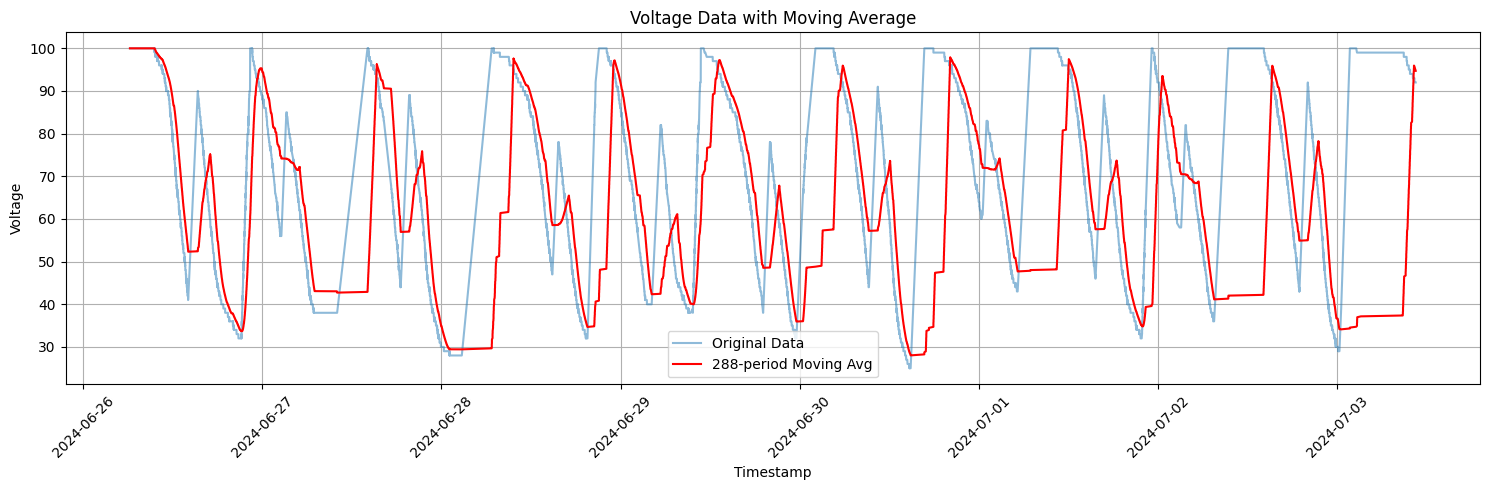

In [10]:
window_size = 288  # Adjust based on your sampling frequency (288 = 12 days for hourly data)
df['Moving_Avg'] = df['Values'].rolling(window=window_size, min_periods=1).mean()

plt.figure(figsize=(15, 5))
plt.plot(df['Timestamp'], df['Values'], label='Original Data', alpha=0.5)
plt.plot(df['Timestamp'], df['Moving_Avg'], label=f'{window_size}-period Moving Avg', color='red')
plt.title('Voltage Data with Moving Average')
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

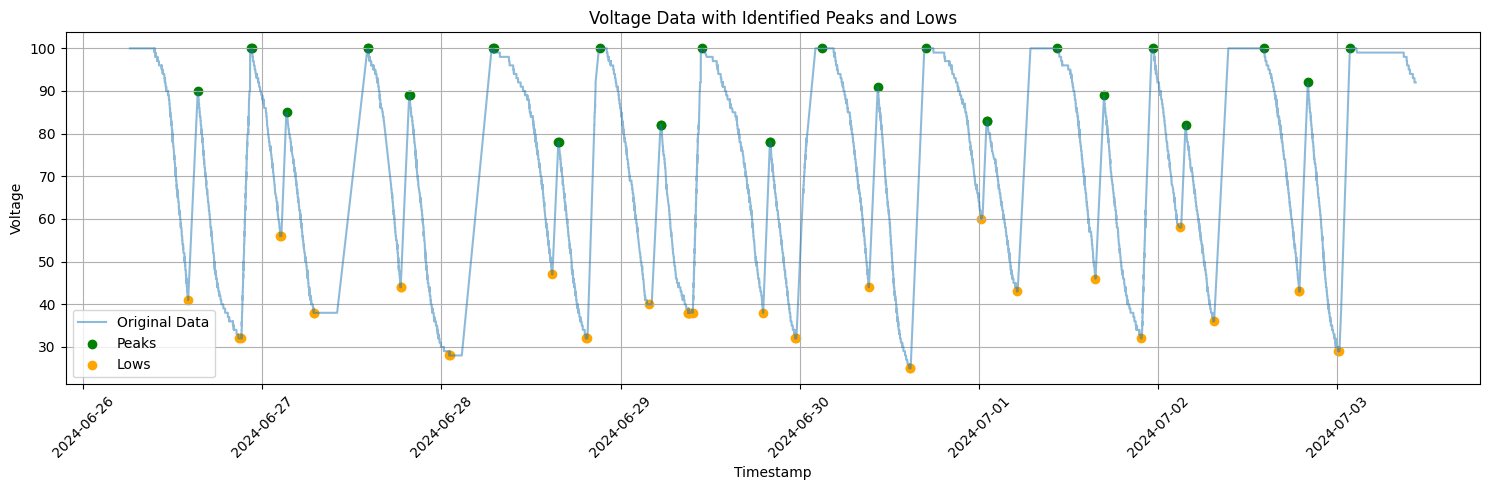

Peaks Table:
+---------------------+----------+
| Timestamp           |   Values |
|---------------------+----------|
| 2024-06-26 15:23:00 |       90 |
| 2024-06-26 22:31:00 |      100 |
| 2024-06-26 22:39:00 |      100 |
| 2024-06-27 03:16:00 |       85 |
| 2024-06-27 14:09:00 |      100 |
| 2024-06-27 14:12:00 |      100 |
| 2024-06-27 19:43:00 |       89 |
| 2024-06-27 19:45:00 |       89 |
| 2024-06-28 06:53:00 |      100 |
| 2024-06-28 07:01:00 |      100 |
| 2024-06-28 15:40:00 |       78 |
| 2024-06-28 15:42:00 |       78 |
| 2024-06-28 21:11:00 |      100 |
| 2024-06-29 05:23:00 |       82 |
| 2024-06-29 05:25:00 |       82 |
| 2024-06-29 10:52:00 |      100 |
| 2024-06-29 20:01:00 |       78 |
| 2024-06-29 20:03:00 |       78 |
| 2024-06-30 03:00:00 |      100 |
| 2024-06-30 10:28:00 |       91 |
| 2024-06-30 16:56:00 |      100 |
| 2024-07-01 01:03:00 |       83 |
| 2024-07-01 01:07:00 |       83 |
| 2024-07-01 10:29:00 |      100 |
| 2024-07-01 16:45:00 |       89 |
| 2024-

In [11]:
peaks, _ = find_peaks(df['Values'], prominence=5)  # Adjust prominence as needed
lows, _ = find_peaks(-df['Values'], prominence=5)  # Find valleys by inverting

peaks_table = df.iloc[peaks][['Timestamp', 'Values']]
lows_table = df.iloc[lows][['Timestamp', 'Values']]

plt.figure(figsize=(15, 5))
plt.plot(df['Timestamp'], df['Values'], label='Original Data', alpha=0.5)
plt.scatter(peaks_table['Timestamp'], peaks_table['Values'], color='green', label='Peaks')
plt.scatter(lows_table['Timestamp'], lows_table['Values'], color='orange', label='Lows')
plt.title('Voltage Data with Identified Peaks and Lows')
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Peaks Table:")
print(tabulate(peaks_table, headers='keys', tablefmt='psql', showindex=False))
print("\nLows Table:")
print(tabulate(lows_table, headers='keys', tablefmt='psql', showindex=False))

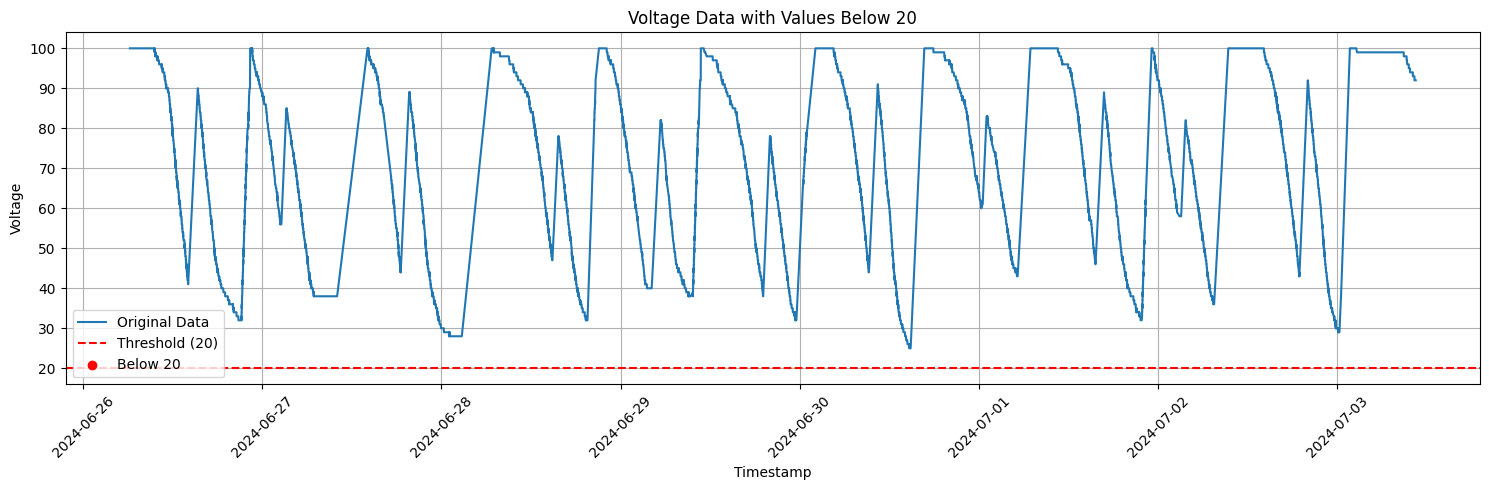


Instances Below 20:
+-------------+----------+
| Timestamp   | Values   |
|-------------+----------|
+-------------+----------+


In [13]:
threshold = 20
below_threshold = df[df['Values'] < threshold]

plt.figure(figsize=(15, 5))
plt.plot(df['Timestamp'], df['Values'], label='Original Data')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold})')
plt.scatter(below_threshold['Timestamp'], below_threshold['Values'], color='red', label=f'Below {threshold}')
plt.title(f'Voltage Data with Values Below {threshold}')
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nInstances Below {threshold}:")
print(tabulate(below_threshold[['Timestamp', 'Values']],
               headers='keys', tablefmt='psql', showindex=False))

2.  Find every instance where the downward slope accelerates in each downward cycle and print the timestamp


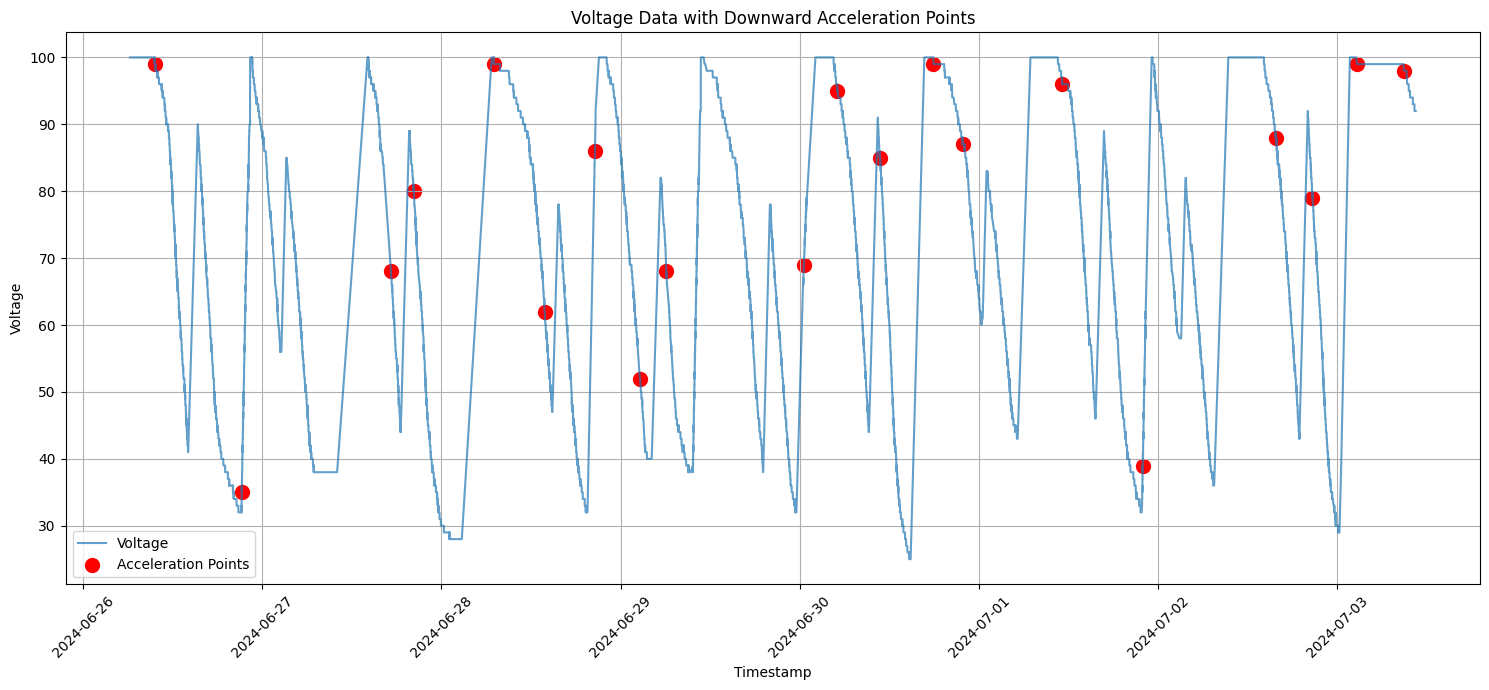

Downward Acceleration Points:
+---------------------+---------+---------+----------------+
| Timestamp           |   Value |   Slope |   Acceleration |
|---------------------+---------+---------+----------------|
| 2024-06-26 09:37:00 |      99 |   -1.00 |          -2.00 |
| 2024-06-26 21:16:00 |      35 |   -1.00 |          -3.00 |
| 2024-06-27 17:15:00 |      68 |  -15.00 |         -15.00 |
| 2024-06-27 20:16:00 |      80 |   -1.00 |          -2.00 |
| 2024-06-28 07:01:00 |      99 |   -1.00 |          -1.00 |
| 2024-06-28 13:49:00 |      62 |   -2.00 |          -3.00 |
| 2024-06-28 20:35:00 |      86 |   -1.00 |          -1.00 |
| 2024-06-29 02:35:00 |      52 |   -5.00 |          -5.00 |
| 2024-06-29 06:07:00 |      68 |   -4.00 |          -4.00 |
| 2024-06-30 00:34:00 |      69 |   -1.00 |          -2.00 |
| 2024-06-30 05:00:00 |      95 |   -1.00 |          -2.00 |
| 2024-06-30 10:43:00 |      85 |   -1.00 |          -2.00 |
| 2024-06-30 17:54:00 |      99 |   -1.00 |          -1

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

df = pd.read_csv('Sample_Data.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df = df.sort_values('Timestamp').reset_index(drop=True)

df['First_Deriv'] = df['Values'].diff()
df['Second_Deriv'] = df['First_Deriv'].diff()

downward_cycles = df[df['First_Deriv'] < 0].copy()
downward_cycles['Cycle_ID'] = (downward_cycles['Timestamp'].diff() > pd.Timedelta('1h')).cumsum()

acceleration_points = []
for cycle_id, group in downward_cycles.groupby('Cycle_ID'):
    acceleration_candidates = group[group['Second_Deriv'] < 0]
    if not acceleration_candidates.empty:
        max_accel_point = acceleration_candidates.loc[acceleration_candidates['Second_Deriv'].idxmin()]
        acceleration_points.append(max_accel_point)

accel_df = pd.DataFrame(acceleration_points)[['Timestamp', 'Values', 'First_Deriv', 'Second_Deriv']]
accel_df = accel_df.sort_values('Timestamp').drop_duplicates()

plt.figure(figsize=(15, 7))
plt.plot(df['Timestamp'], df['Values'], label='Voltage', alpha=0.7)
plt.scatter(accel_df['Timestamp'], accel_df['Values'], color='red', s=100, label='Acceleration Points')
plt.title('Voltage Data with Downward Acceleration Points')
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Downward Acceleration Points:")
print(tabulate(accel_df, headers=['Timestamp', 'Value', 'Slope', 'Acceleration'], tablefmt='psql', floatfmt=".2f", showindex=False))